In [3]:
!pip install keras
!pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
    100% |████████████████████████████████| 51kB 17.6MB/s ta 0:00:01
    100% |████████████████████████████████| 296kB 26.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for keras-applications ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/dd/f2/5d/2689b5547f32c4e258c3b7ccbe7f1d0f2afbb84fb01e830792
Successfully built keras-applications
typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/00/b6/9cfa56b4081ad13874b0c6f96af8ce16cfbc1cb06bedf8e9164ce5551ec1/pip-19.3.1-py2.py3-none-any.whl
typing-extensions 3.7.4.1 has requirement typing>=3.7.4;

In [16]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

In [17]:
# Directory path
train_data_dir = 'data/bwcracks/train'
test_data_dir = 'data/bwcracks/test'

# Get all the data in the directory data/validation, and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(256, 256), batch_size=463)

# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(256, 256), batch_size=1814)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 0 images belonging to 3 classes.
Found 1814 images belonging to 3 classes.


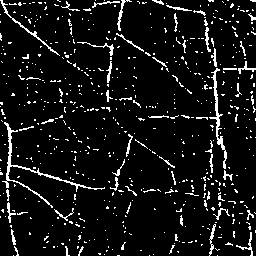

In [9]:
# Previewing an image
array_to_img(train_images[15])

In [10]:
train_images.shape

(1814, 256, 256, 3)

In [11]:
# Checking shape of data
print('train data shape:', np.shape(train_images), np.shape(train_labels))
print('test data shape:', np.shape(test_images), np.shape(test_labels))

train data shape: (1814, 256, 256, 3) (1814, 3)
test data shape: (0, 256, 256, 3) (0, 3)


In [13]:
# Unrowing/reshaping
train_img = train_images.reshape(train_images.shape[0], -1)
print('train_img:', np.shape(train_img))

# test_img = test_images.reshape(test_images.shape[0], -1)
# print('test_img:', np.shape(test_img))

train_img: (1814, 196608)


In [14]:
# Looking at the labels
train_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [15]:
train_generator.class_indices

{'.ipynb_checkpoints': 0, 'Dutch': 1, 'Flemish': 2}

In [13]:
# Transposing the labels
train_y = np.reshape(train_labels[:,0], (1839,1))
print('train labels final:', np.shape(train_y))

test_y = np.reshape(test_labels[:,0], (463,1))
print('test labels final:', np.shape(test_y))

train labels final: (1839, 1)
test labels final: (463, 1)


In [14]:
from keras import models
from keras import layers

In [19]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(65536,))) #2 hidden layers
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=5,
                    batch_size=100,
                    validation_split=0.3)

Train on 1287 samples, validate on 552 samples
Epoch 1/5
1287/1287 [==============================] - 2s 1ms/step - loss: 8.9437 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348
Epoch 2/5
1287/1287 [==============================] - 1s 439us/step - loss: 9.0923 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348
Epoch 3/5
1287/1287 [==============================] - 1s 431us/step - loss: 9.0923 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348
Epoch 4/5
1287/1287 [==============================] - 1s 432us/step - loss: 9.0923 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348
Epoch 5/5
1287/1287 [==============================] - 1s 436us/step - loss: 9.0923 - acc: 0.4359 - val_loss: 9.1102 - val_acc: 0.4348


In [22]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(filters=10, kernel_size=10, strides=2, activation='relu',
                        input_shape=(256, 256,  1)))
model.add(layers.MaxPooling2D((10, 10)))

# model.add(layers.Conv2D(filters=10, kernel_size=5, strides=2,activation='relu'))
# model.add(layers.MaxPooling2D((4, 4)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))

# model.add(layers.Conv2D(filters=10, kernel_size=1, strides=2,activation='relu'))
# model.add(layers.AveragePooling2D((1, 1)))


model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
# model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
# from keras.optimizers import SGD
# opt = SGD(lr=0.00001)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_9 = model.fit(train_images,
                    train_y,
                    epochs=1200,
                    batch_size=32,
                    validation_split=0.3)

Train on 1287 samples, validate on 552 samples
Epoch 1/1200
1287/1287 [==============================] - 4s 3ms/step - loss: 0.8795 - acc: 0.5338 - val_loss: 0.7437 - val_acc: 0.5525
Epoch 2/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.7255 - acc: 0.5548 - val_loss: 0.7317 - val_acc: 0.5489
Epoch 3/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.7010 - acc: 0.5726 - val_loss: 0.7255 - val_acc: 0.5217
Epoch 4/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.6928 - acc: 0.5789 - val_loss: 0.7298 - val_acc: 0.5362
Epoch 5/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.6868 - acc: 0.5781 - val_loss: 0.7219 - val_acc: 0.5399
Epoch 6/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.6751 - acc: 0.5952 - val_loss: 0.7111 - val_acc: 0.5616
Epoch 7/1200
1287/1287 [==============================] - 2s 2ms/step - loss: 0.6693 - acc: 0.5944 - val_loss: 0.7115 - val_acc: 0.5489
E